# Definição Formal de Programação Linear (PL)

Um problema de **programação linear** pode ser expresso na forma canônica:

$$
\begin{aligned}
\max \quad & c^T x \\
\text{sujeito a} \quad & A x \leq b, \\
& x \geq 0,
\end{aligned}
$$

onde:

* $x \in \mathbb{R}^n$ é o vetor de **variáveis de decisão**;
* $c \in \mathbb{R}^n$ é o vetor de **coeficientes da função objetivo**;
* $A \in \mathbb{R}^{m \times n}$ é a **matriz de restrições**;
* $b \in \mathbb{R}^m$ é o vetor de **limites das restrições**.


## Elementos

* **Função Objetivo**: Linear em $x$ (ex.: maximizar lucro, minimizar custo).
* **Restrições**: Cada linha de $A x \leq b$ é uma inequação linear (pode-se generalizar para $=$ ou $\geq$).
* **Conjunto factível**:
$$
P = \{ x \in \mathbb{R}^n | A x \leq b, x \geq 0 \}
$$
que é um **poliedro convexo** no espaço $\mathbb{R}^n$.

## Propriedades Fundamentais

1. O conjunto factível de um PL é sempre **convexo**.
2. Se existir solução ótima, ela ocorre em um **vértice (extremo)** do poliedro factível.
3. Algoritmos clássicos de resolução:

   * **Simplex** (explora os vértices).
   * **Métodos de pontos interiores** (navegam pelo interior do poliedro).

## Exemplo em $\mathbb{R}^2$:

$$
\begin{aligned}
\max \quad & x_1 + x_2 \\
\text{sujeito a} \quad & x_1 + 2x_2 \leq 2 \\
& 2x_1 + x_2 \leq 2 \\
& 2x_1, x_2 \geq 0
\end{aligned}
$$

O conjunto factível é um polígono no plano, e a solução ótima ocorre em um dos vértices.

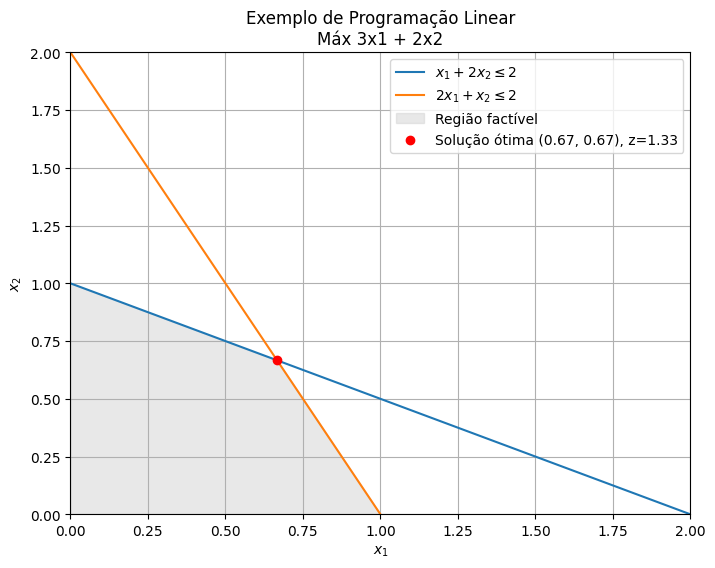

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Definição do problema
c = [-1, -1]  # Negativo porque linprog minimiza
A = [[1, 2], [2, 1]]
b = [2, 2]
x_bounds = (0, None)
y_bounds = (0, None)

# Resolver com linprog
res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method="highs")

# Pegar a solução ótima
x_opt, y_opt = res.x
z_opt = x_opt + y_opt

# Preparar grid para plot
x = np.linspace(0, 2, 400)
y1 = -0.5*x + 1     # da restrição x1 + 2x2 <= 2
y2 = -2*x + 2       # da restrição 2x1 + x2 <= 2

# Plot das restrições
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label=r"$x_1 + 2x_2 \leq 2$")
plt.plot(x, y2, label=r"$2x_1 + x_2 \leq 2$")

# Região factível (preenchida)
y3 = np.minimum(y1, y2)
y3 = np.maximum(y3, 0)
plt.fill_between(x, 0, y3, where=(y3>=0), color="lightgray", alpha=0.5, label="Região factível")

# Ponto ótimo
plt.plot(x_opt, y_opt, "ro", label=f"Solução ótima ({x_opt:.2f}, {y_opt:.2f}), z={z_opt:.2f}")

# Ajustes de gráfico
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Exemplo de Programação Linear\nMáx x1 + x2")
plt.legend()
plt.grid(True)
plt.show()
